# Import libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

#Read the data and put it in dataframe

In [2]:
Heart_df=pd.read_csv(r"/content/heart_disease.txt", delimiter=',')
#convert the txt file to csv file and split each column

In [3]:

Heart_df


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#Add row contains the names of the features

In [4]:
feature_names = [
    'Age',
    'Sex',
    'Chest Pain type',
    'Resting Blood Pressure',
    'Cholesterol',
    'Fasting Blood Sugar',
    'Resting ECG Results',
    'Maximum HR Achieved',
    'Angina',
    'ST Depression',
    'Slope of Peak Exercise ST Segment',
    'Number of Major Vessels',
    'Thalassemia',
    'Heart Disease'
]


Heart_df.columns = feature_names

# Features description:

1. Age

2. Sex:
Values:
1: Male
0: Female

3. Chest Pain Type:
Description: Type of chest pain experienced by the patient.
Values:
1: Typical angina
2: Atypical angina
3: Non-anginal pain
4: Asymptomatic

4. Resting Blood Pressure:
Description: Resting blood pressure in mm Hg.
Values: Continuous numerical values (e.g., 120.0, 160.0).

5. Cholesterol:
Description: Serum cholesterol in mg/dl.
Values: Continuous numerical values (e.g., 204.0, 300.0).

6. Fasting Blood Sugar:
Description: Fasting blood sugar > 120 mg/dl.
Values:
1: True
0: False

7. Resting ECG Results:
Description: Results of the resting electrocardiogram.
Values:
0: Normal
1: Having ST-T wave abnormality
2: Showing probable or definite left ventricular hypertrophy

8. Maximum HR Achieved:
Description: Maximum heart rate achieved by the patient.
Values: Continuous numerical values (e.g., 150.0, 180.0).

9. Angina:
Description: Exercise induced angina.
Values:
1: Yes
0: No

10. ST Depression:
Description: ST depression induced by exercise relative to rest.
Values: Continuous numerical values (e.g., 2.3, 3.0).

11. Slope of Peak Exercise ST Segment:
Description: Slope of the peak exercise ST segment.
Values:
1: Upsloping
2: Flat
3: Downsloping

12. Number of Major Vessels:
Description: Number of major vessels colored by fluoroscopy.
Values: Integer values from 0 to 3.

13. Thalassemia:
Description: Thalassemia status.
Values:
1: Normal (no thalassemia)
2: Minor thalassemia
3: Moderate thalassemia
4: Severe thalassemia
5: Thalassemia major
6: Another specific type of thalassemia (like hemoglobin E or similar)
7: Unknown or other

14. Heart disease:
Description: Diagnosis of heart disease.
Values:
1: No heart disease
2: Heart disease present (mild)
3: Heart disease present (moderate)
4: Heart disease present (severe)


In [5]:
Heart_df

,Age,Sex,Chest Pain type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum HR Achieved,Angina,ST Depression,Slope of Peak Exercise ST Segment,Number of Major Vessels,Thalassemia,Heart Disease
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1



*  Note: the target is the last column Heart Disease






#Data preprocessing



*   split numerical and catagorical data



In [6]:
numerical_features = [
    'Age',
    'Resting Blood Pressure',
    'Cholesterol',
    'Maximum HR Achieved',
    'ST Depression',
    'Number of Major Vessels'
]
categorical_features = [
    'Sex',
    'Chest Pain type',
    'Fasting Blood Sugar',
    'Resting ECG Results',
    'Angina',
    'Slope of Peak Exercise ST Segment',
    'Thalassemia',
    'Heart Disease'
]



*   fill the missing values



In [7]:
#Fill missing values for numerical features with mean
for feature in numerical_features:
    Heart_df[feature] = pd.to_numeric(Heart_df[feature], errors='coerce')
    mean_value = Heart_df[feature].mean()
    Heart_df[feature].fillna(mean_value, inplace=True)

# Fill missing values for categorical features with mode
for feature in categorical_features:
    Heart_df[feature].replace('?', pd.NA, inplace=True)
    mode_value = Heart_df[feature].mode()[0]
    Heart_df[feature].fillna(mode_value, inplace=True)

In [8]:
Heart_df


,Age,Sex,Chest Pain type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum HR Achieved,Angina,ST Depression,Slope of Peak Exercise ST Segment,Number of Major Vessels,Thalassemia,Heart Disease
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


In [9]:
Heart_df.isnull().sum()

,0
Age,0
Sex,0
Chest Pain type,0
Resting Blood Pressure,0
Cholesterol,0
Fasting Blood Sugar,0
Resting ECG Results,0
Maximum HR Achieved,0
Angina,0
ST Depression,0


In [10]:
(Heart_df == '?').sum()

,0
Age,0
Sex,0
Chest Pain type,0
Resting Blood Pressure,0
Cholesterol,0
Fasting Blood Sugar,0
Resting ECG Results,0
Maximum HR Achieved,0
Angina,0
ST Depression,0




*   the processing of the data is done



# Graphical Reprsenation

<Axes: xlabel='Sex', ylabel='count'>

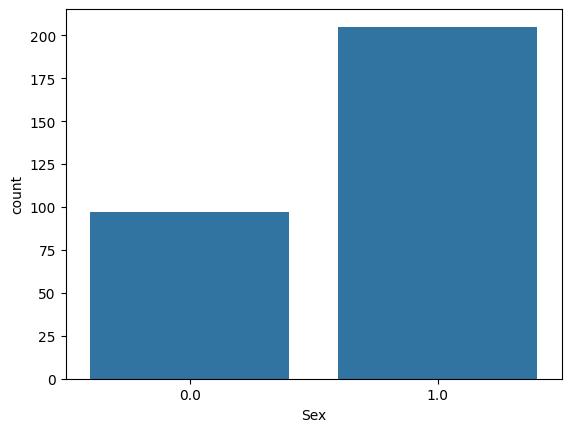

In [11]:
sns.countplot(x=Heart_df['Sex'])

* males in this dataset are more than females

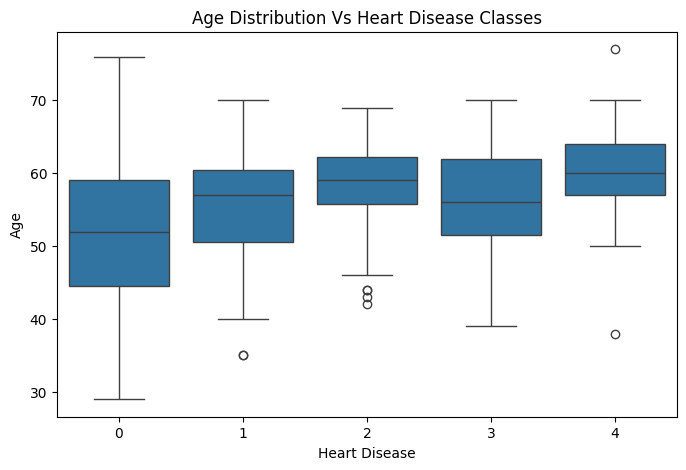

In [12]:
# Boxplot for Age vs Heart Disease before normalize the numerical data
plt.figure(figsize=(8, 5))
sns.boxplot(x='Heart Disease', y='Age', data=Heart_df)
plt.title('Age Distribution Vs Heart Disease Classes')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

* People with heart disease are around 58 years old on average.
* Age is a factor, and as people get older, they are more likely to develop heart disease.

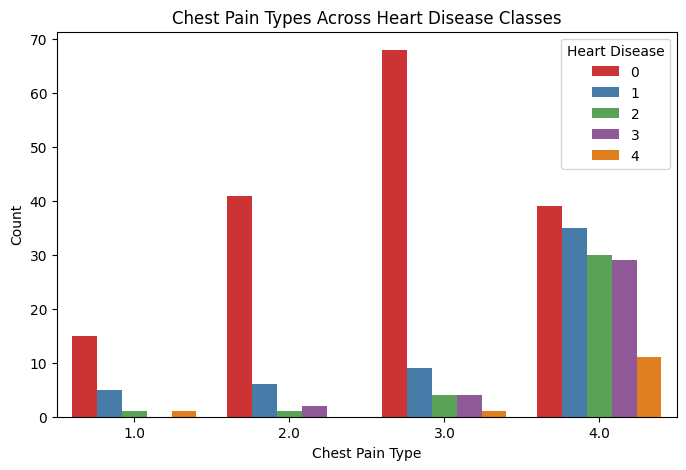

In [13]:
#Count plot of chest paon type according to heart disease
plt.figure(figsize=(8, 5))
sns.countplot(x='Chest Pain type', hue='Heart Disease', data=Heart_df, palette='Set1')
plt.title('Chest Pain Types Across Heart Disease Classes')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

* Most people with chest pain type 1 (Atypical Angina) do not have heart disease. Similarly, people with non-anginal chest pain usually do not have moderate heart disease. If they do have moderate heart disease, they tend to have asymptomatic chest pain and so on illustrate from the perivous graph


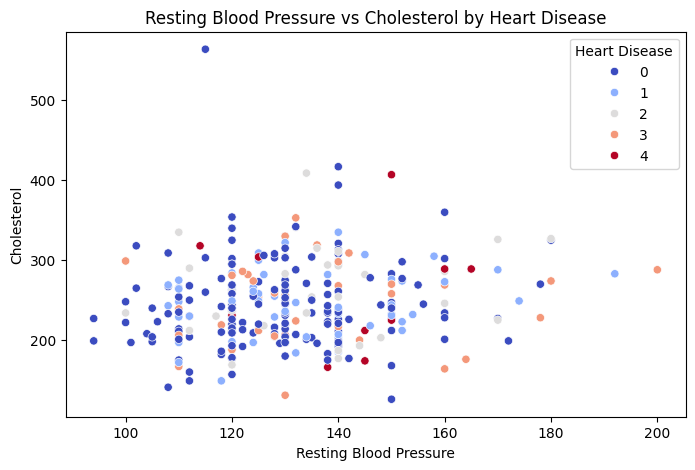

In [14]:
# resting blood pressure Vs cholesterol according to heart disease
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Resting Blood Pressure', y='Cholesterol', hue='Heart Disease', data=Heart_df, palette='coolwarm')
plt.title('Resting Blood Pressure vs Cholesterol by Heart Disease')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.show()

* There is no obvious linear relationship between Resting Blood Pressure and Cholesterol.
* The plot shows a general spread of cholesterol levels across different blood pressure values, with different heart disease categories scattered throughout.
* Individuals with heart disease types 3 and 4 (orange and red dots) seem to have varied Cholesterol levels across the Resting Blood Pressure range, but they are less frequent compared to other categories

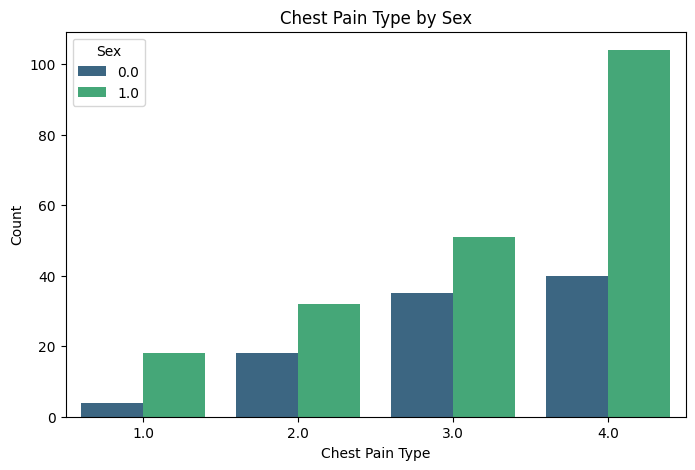

In [15]:
#chest pain vs sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Chest Pain type', hue='Sex', data=Heart_df, palette='viridis')
plt.title('Chest Pain Type by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

* Males are more likely to have severe heart disease compared to females.

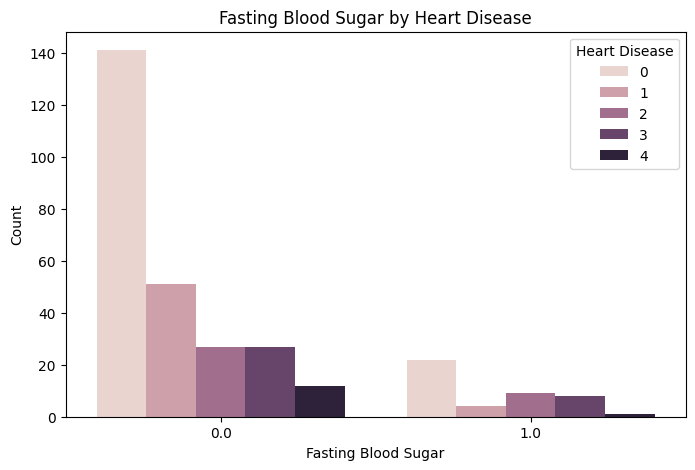

In [16]:
#heart disease Vs Fasting Blood Sugar
plt.figure(figsize=(8, 5))
sns.countplot(x='Fasting Blood Sugar', hue='Heart Disease', data=Heart_df)
plt.title('Fasting Blood Sugar by Heart Disease')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()


In [17]:
class_distribution = Heart_df['Heart Disease'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 Heart Disease
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64


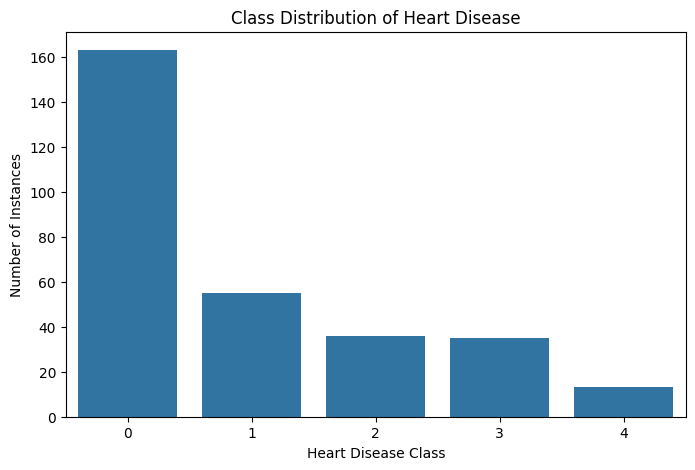

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x=Heart_df['Heart Disease'])
plt.title('Class Distribution of Heart Disease')
plt.xlabel('Heart Disease Class')
plt.ylabel('Number of Instances')
plt.show()



*  normalization to numerical data



In [19]:
scaler = StandardScaler()
# Apply standardization
Heart_df[numerical_features] = scaler.fit_transform(Heart_df[numerical_features])

## Split data to target and inputs

In [19]:
X = Heart_df.drop('Heart Disease', axis=1)
y = Heart_df['Heart Disease']

In [20]:
rng = np.random.RandomState(42)
random_unlabeled_mask = rng.rand(y.shape[0]) < 0.30 #make the values of the target data 30% unlabled and 70% labeled
y[random_unlabeled_mask] = -1

<ipython-input-20-f13be3e115d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[random_unlabeled_mask] = -1


In [21]:
random_unlabeled_mask

array([False, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False,



*   False: labeled
*   True: unlabeled



In [22]:
class_distribution_1 = Heart_df['Heart Disease'].value_counts()
print("Class Distribution:\n", class_distribution_1)

Class Distribution:
 Heart Disease
 0    112
-1     96
 1     33
 2     30
 3     22
 4      9
Name: count, dtype: int64


* unlabeled data take 30% from all classes

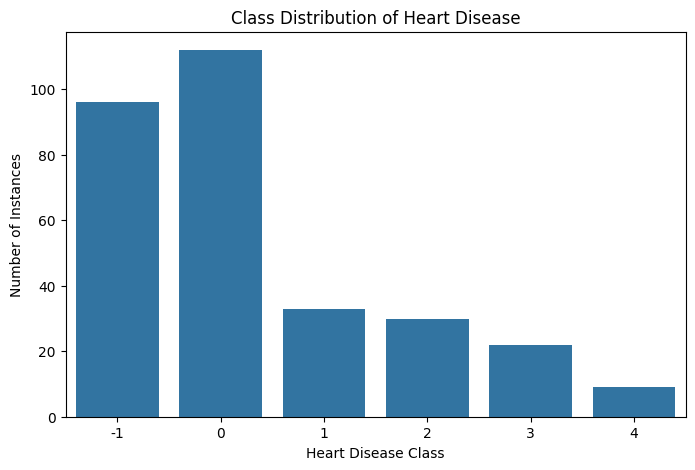

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x=Heart_df['Heart Disease'])
plt.title('Class Distribution of Heart Disease')
plt.xlabel('Heart Disease Class')
plt.ylabel('Number of Instances')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Label propagation



In [25]:
label_prop_model = LabelPropagation()
label_prop_model.fit(X_train, y_train)
y_pred = label_prop_model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test[y_test != -1], y_pred[y_test != -1])
print(f'Label Propagation Accuracy: {acc:.2f}')

Label Propagation Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


# Label Spreading

In [26]:
label_spread = LabelSpreading()
label_spread.fit(X_train, y_train)
y_pred = label_spread.predict(X_test)

# Evaluation
acc = accuracy_score(y_test[y_test != -1], y_pred[y_test != -1])
print(f'Label Spreading Accuracy: {acc:.2f}')

Label Spreading Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


# Apply SVM

In [27]:

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)  # Train only on labeled data
y_pred_svm = svm_model.predict(X_test)



# Evaluation
acc = accuracy_score(y_test[y_test != -1], y_pred[y_test != -1])
print(f'Self-Training Model Accuracy: {acc:.2f}')

Self-Training Model Accuracy: 0.55


# Evaluation

In [28]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [29]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, model_name)

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

Evaluation for Label Propagation:
Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.55        44
   macro avg       0.11      0.20      0.14        44
weighted avg       0.30      0.55      0.39        44



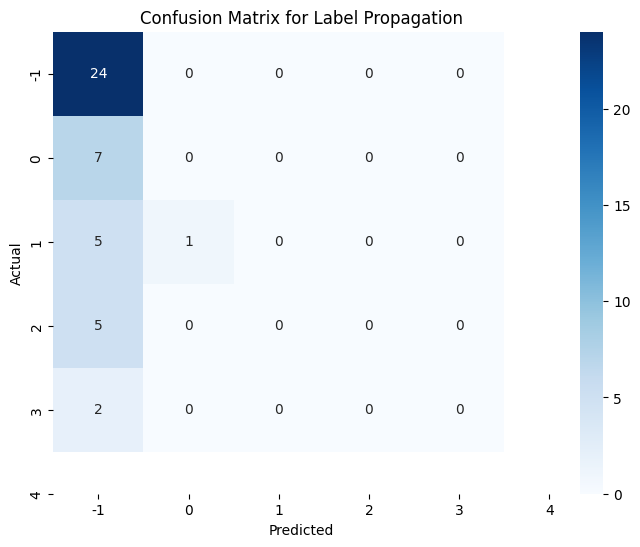

In [30]:
label_prop_model = LabelPropagation()
label_prop_model.fit(X_train, y_train)
y_pred_label_prop = label_prop_model.predict(X_test)
evaluate_model(y_test[y_test != -1], y_pred_label_prop[y_test != -1], "Label Propagation")

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

Evaluation for Label Spreading:
Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.55        44
   macro avg       0.11      0.20      0.14        44
weighted avg       0.30      0.55      0.39        44



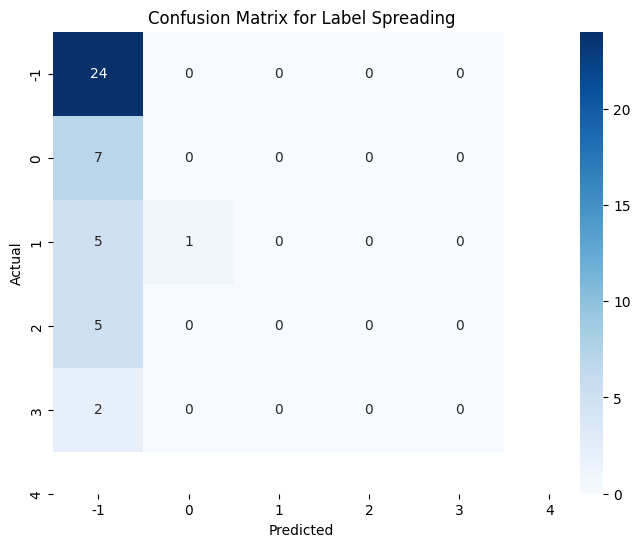

In [31]:
label_spread = LabelSpreading()
label_spread.fit(X_train, y_train)
y_pred_label_spread = label_spread.predict(X_test)
evaluate_model(y_test[y_test != -1], y_pred_label_spread[y_test != -1], "Label Spreading")

Evaluation for Self-Training Model:
Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        24
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.55        44
   macro avg       0.11      0.20      0.14        44
weighted avg       0.30      0.55      0.39        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


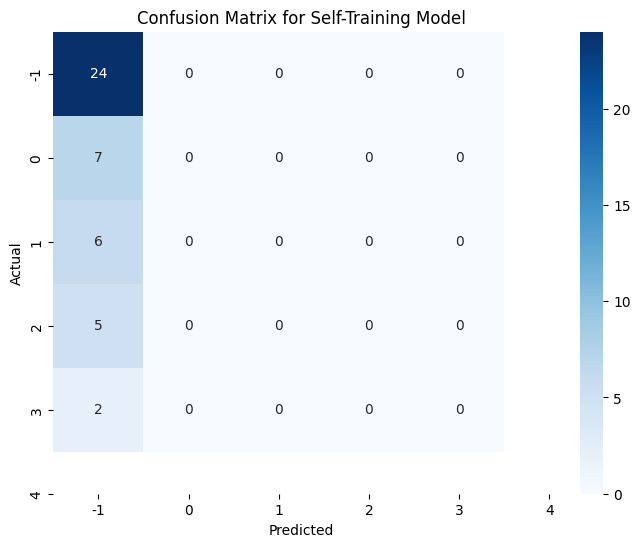

In [32]:
self_training_model = SelfTrainingClassifier(SVC(probability=True))
self_training_model.fit(X_train, y_train)
y_pred_self_training = self_training_model.predict(X_test)
evaluate_model(y_test[y_test != -1], y_pred_self_training[y_test != -1], "Self-Training Model")

Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Evaluation for Best SVM Model:
Accuracy: 0.6136363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.14      0.14      0.14         7
           2       0.43      0.50      0.46         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.61        44
   macro avg       0.29      0.32      0.30        44
weighted avg       0.56      0.61      0.59        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


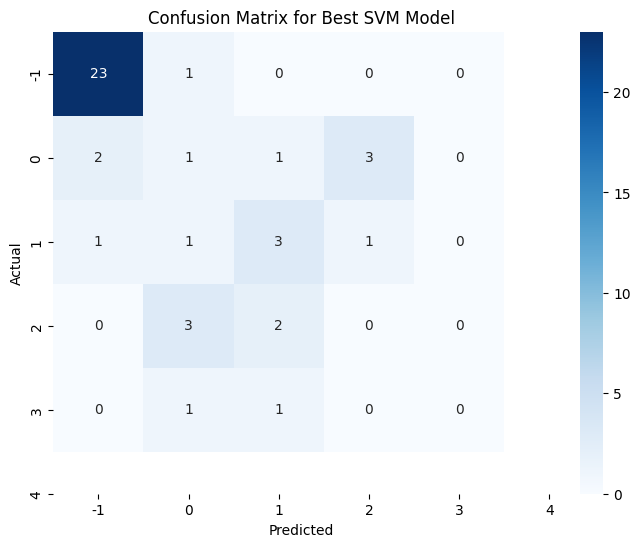

In [33]:
#trying to find the optimum parameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid_search.fit(X_train[y_train != -1], y_train[y_train != -1])

# Best parameters
print("Best parameters for SVM:", grid_search.best_params_)

# Evaluate the best SVM model
best_svm_model = grid_search.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)
evaluate_model(y_test[y_test != -1], y_pred_best_svm[y_test != -1], "Best SVM Model")

* I tried to apply normalization on numerical data but the result is better than without normalization